In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.model_selection import KFold, cross_validate, train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression

# 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainedohedata/traindataohe.csv
/kaggle/input/ytrainfat/y_trainfat.csv


In [3]:
train=pd.read_csv("/kaggle/input/trainedohedata/traindataohe.csv")
y=pd.read_csv("/kaggle/input/ytrainfat/y_trainfat.csv")

In [4]:
train.columns

Index(['Unnamed: 0', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [5]:
train.drop(columns="Unnamed: 0", inplace=True)

In [6]:
y.shape


(22845, 2)

In [7]:
#build model without weight to test accuracy and improtant factors

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y['NObeyesdad'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# X_train_full, X_valid_full = X_train_full.align(X_valid_full, join='left', axis=1)

In [10]:
X_train.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [19]:
model_dic={}


In [22]:
def run_model(model, model_name):
  model.fit(X_train,y_train)
  train_score=model.score(X_train,y_train)
  test_score=model.score(X_test,y_test)

  print(f"{model} \n\nscore on train data: {train_score}")

  print(f"\n\nscore on test data: {test_score}")

  y_pred=model.predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  f1_scoret=f1_score(y_pred,y_test, average="weighted")
  model_dic[model_name] = {'model': model_name, 'train_score': train_score, 'test_score': test_score, "f1_score": f1_scoret}

#put them in dataframe with words"




  return

In [23]:
params1 = {
    'n_estimators': 1312,
    'learning_rate': 0.018,
    'gamma': 0.0024,
    'reg_alpha': 0.90,
    'reg_lambda': 0.069,
    'max_depth': 5,
    'min_child_weight': 5,
    'subsample': 0.88,
    'colsample_bytree': 0.66
}

In [24]:
xg_model_final = XGBClassifier(**params1
#     n_estimators= 540, max_depth=8, learning_rate= 0.0713997188995139, subsample= 0.9, 
#                                alpha= 0.9134237557875063, reg_lambda = 0.20785745447223258, gamma = .8027626574590816,
#                                tree_method='exact', random_state= 1121218
)

xg_model_final.fit(X_train, y_train, 
                  
                  eval_set=[(X_test, y_test)],
                  eval_metric='mlogloss',
                  verbose=False)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.66, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0024, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.018, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1312, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
run_model(xg_model_final, "XGBClassifier")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.66, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0024, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.018, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1312, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) 

score on train data: 0.9508098052090173


score on test data: 0.9181440140074415
[[520  20   0   0   0   4   0]
 [ 26 608   2   0   0  38   6]
 [  1   0 585  16   3   5  26]
 [  0   0  12 711   1   0   3]
 [  0   1   1   0 899   0   0

In [13]:
y_pred=xg_model_final.predict(X_test)

In [14]:
accuracy_score(y_pred,y_test)

0.9181440140074415

In [15]:
xg_model_final.feature_importances_


array([0.03077698, 0.03576208, 0.17583749, 0.094708  , 0.02446662,
       0.02876521, 0.01332109, 0.03238871, 0.19048768, 0.04136598,
       0.03454646, 0.06051646, 0.02677728, 0.07587589, 0.00465964,
       0.0300429 , 0.01253707, 0.02629576, 0.03532193, 0.00209622,
       0.        , 0.01867951, 0.0047709 ], dtype=float32)

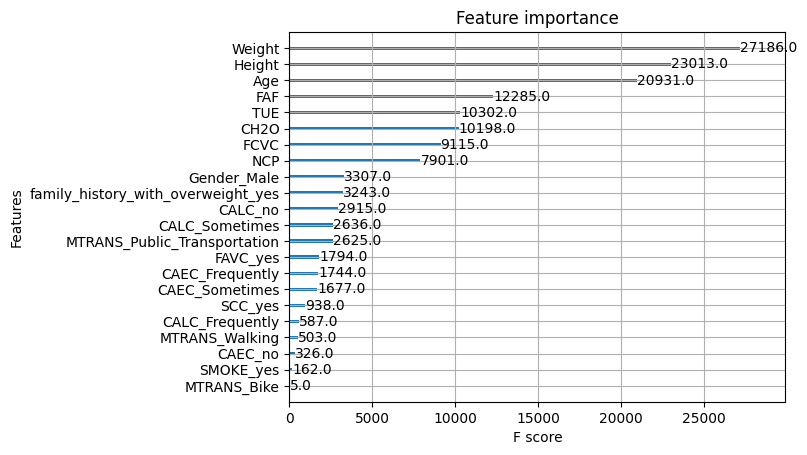

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
# plot feature importance
plot_importance(xg_model_final)
plt.show()


In [27]:
params2 = {
    "objective": "multiclass","metric": "multi_logloss","verbosity": -1,"boosting_type": "gbdt","random_state": 42, "num_class": 7,
    'learning_rate': 0.030962211546832760, 'n_estimators': 500,'lambda_l1': 0.009667446568254372,'lambda_l2': 0.04018641437301800,
    'max_depth': 10,'colsample_bytree': 0.40977129346872643, 'subsample': 0.9535797422450176,'min_child_samples': 26             

In [28]:
lgbm_classifier = LGBMClassifier(**params2)

lgbm_classifier.fit(X_train, y_train)

y_pred = lgbm_classifier.predict(X_test)
accuracy_score(y_pred, y_test)
# cv_scores = cross_val_score(lgbm_classifier, X_train_full, y_train, cv=5, scoring=make_scorer(accuracy_score))

0.9170496826439046

In [30]:
run_model(lgbm_classifier, "LGBMClassifier")

LGBMClassifier(colsample_bytree=0.4097712934687264,
               lambda_l1=0.009667446568254372, lambda_l2=0.040186414373018,
               learning_rate=0.03096221154683276, max_depth=10,
               metric='multi_logloss', min_child_samples=26, n_estimators=500,
               num_class=7, objective='multiclass', random_state=42,
               subsample=0.9535797422450176, verbosity=-1) 

score on train data: 0.9794812869336835


score on test data: 0.9170496826439046
[[516  23   0   0   0   5   0]
 [ 22 608   0   0   0  40  10]
 [  1   0 588  16   4   6  21]
 [  0   0   8 715   1   0   3]
 [  0   1   2   0 898   0   0]
 [  4  49   8   0   0 384  48]
 [  0  15  39   2   0  51 481]]


In [33]:
log_reg=LogisticRegression(max_iter=15000)
run_model(log_reg, "Logistic Regresion")

LogisticRegression(max_iter=15000) 

score on train data: 0.8532501641497046


score on test data: 0.8522652659225214
[[516  25   0   0   0   2   1]
 [ 71 533   2   0   0  63  11]
 [  1   0 545  38   8   8  36]
 [  0   0  29 697   0   0   1]
 [  0   0   1   1 898   1   0]
 [  3  65  17   0   0 322  86]
 [  0  19 104   8   0  74 383]]


In [34]:
pd.DataFrame.from_dict(model_dic)


,XGBClassifier,LGBMClassifier,Logistic Regresion
model,XGBClassifier,LGBMClassifier,Logistic Regresion
train_score,0.95081,0.979481,0.85325
test_score,0.918144,0.91705,0.852265
f1_score,0.918488,0.917371,0.854451


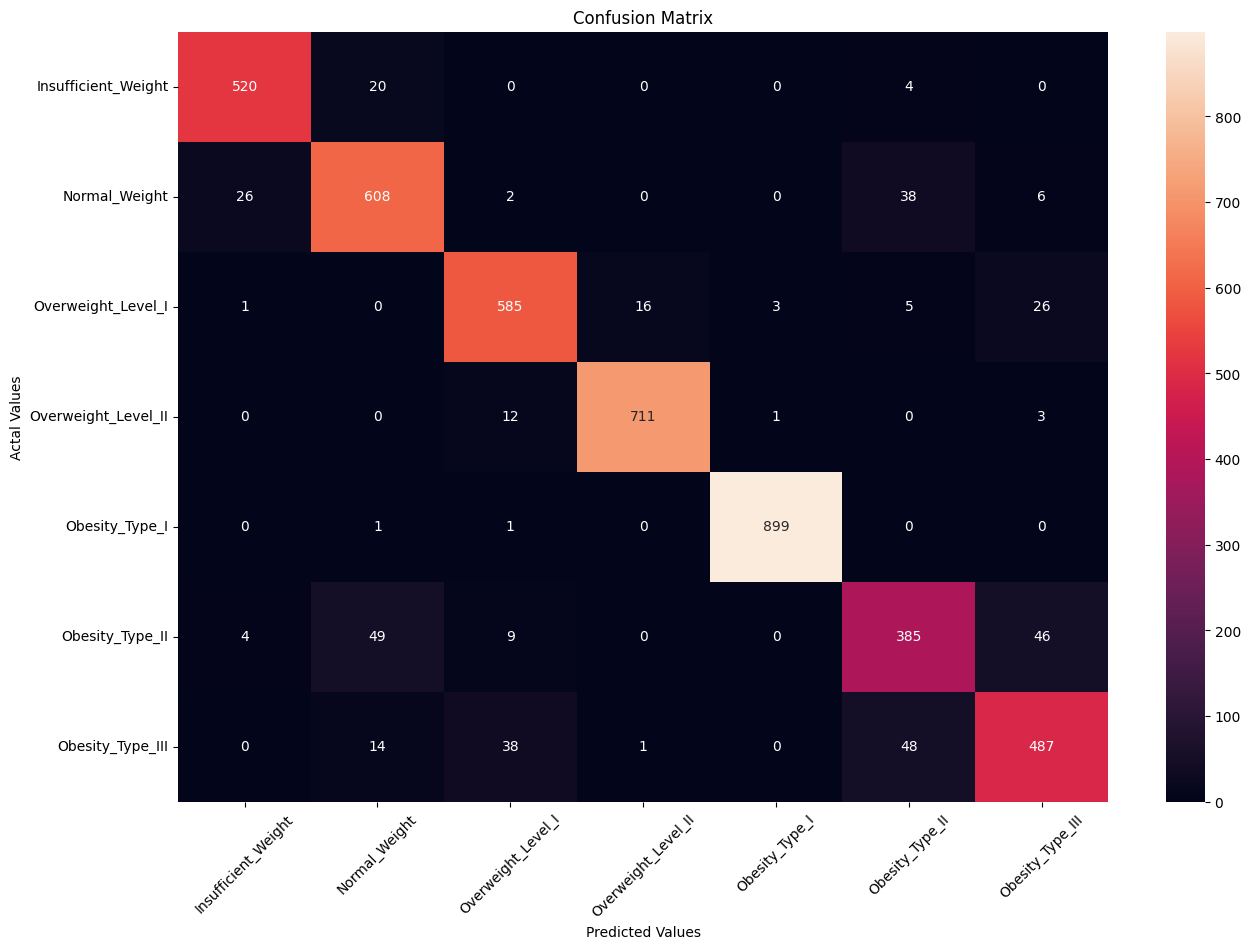

In [59]:
import seaborn as sns

y_pred = xg_model_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, dtype= int,
                     index = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], 
                     columns = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.xticks(rotation=45)
plt.show()